Demandas:

0 Bodega=0 
1 UDLA=20 
2 Inacap=20 
3 Linde=5 
4 Suractivo=10 
5 Econorent=5 
6 Digosa=5 
7 Optimisa=5 
8 Ainahue Club de Campo=5 
9 Constructora Bio Casa=5 
10 Salazar Israel Automotriz=5 
11 Sergio escobar Automotriz=5 
12 AFP Modelo=5 
13 Strip Villuco=5 
14 Deligourmet=5 
15 Caja Compensación la Araucana=5 

Matriz de Costos:
[0, 15, 27, 12, 9, 8, 14, 11, 11, 11, 9, 4, 12, 21, 12, 14]
[14, 0, 14, 16, 17, 15, 20, 7, 1, 15, 8, 14, 4, 14, 16, 2]
[24, 15, 0, 6, 4, 2, 16, 15, 15, 11, 9, 6, 16, 20, 14, 15]
[13, 14, 10, 0, 7, 11, 19, 16, 16, 17, 13, 9, 15, 19, 18, 14]
[8, 13, 5, 12, 0, 6, 14, 14, 17, 14, 11, 5, 13, 19, 12, 14]
[8, 14, 6, 7, 3, 0, 15, 15, 16, 12, 9, 5, 16, 19, 14, 15]
[10, 16, 10, 15, 13, 11, 0, 14, 19, 13, 18, 11, 15, 25, 11, 16]
[12, 5, 12, 14, 15, 13, 18, 0, 4, 12, 9, 13, 3, 15, 13, 3]
[13, 5, 17, 16, 16, 16, 16, 4, 0, 13, 9, 13, 5, 14, 14, 3]
[12, 13, 14, 17, 13, 13, 11, 11, 13, 0, 14, 12, 14, 24, 3, 14]
[8, 5, 14, 13, 12, 13, 13, 4, 7, 12, 0, 8, 6, 14, 14, 

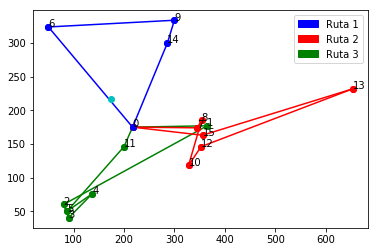

In [5]:
import numpy
import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltt
import matplotlib.patches as mpatches
import time
from sage.all import *

# INICIALIZACIÓN DEL PROBLEMA
# n: cantidad de nodos, incluido el depósito
# m - número de vehículos (= número de rutas)
# Q - capacidad del vehículo
n = 16
m = 3
Q = 100
nodes = numpy.arange(0,n,1)
nodos=[0,217,175,
       1,365,177,
       2,80,60,
       3,90,40,
       4,137,76,
       5,87,50,
       6,50,324,
       7,345,174,
       8,354,185,
       9,300,334,
       10,328,118,
       11,200,146,
       12,353,146,
       13,654,232,
       14,286,300,
       15,356,163]
requisitos=[0,0,
            1,20,
            2,20,
            3,5,
            4,10,
            5,5,
            6,5,
            7,5,
            8,5,
            9,5,
            10,5,
            11,5,
            12,5,
            13,5,
            14,5,
            15,5]
empresa = ['0 Bodega','1 UDLA','2 Inacap','3 Linde','4 Suractivo','5 Econorent','6 Digosa','7 Optimisa','8 Ainahue Club de Campo','9 Constructora Bio Casa',
            '10 Salazar Israel Automotriz','11 Sergio escobar Automotriz','12 AFP Modelo','13 Strip Villuco','14 Deligourmet','15 Caja Compensación la Araucana']
c = numpy.zeros(shape=(n,n))
c = [[0,15,27,12,9,8,14,11,11,11,9,4,12,21,12,14],[14,0,14,16,17,15,20,7,1,15,8,14,4,14,16,2],[24,15,0,6,4,2,16,15,15,11,9,6,16,20,14,15],[13,14,10,0,7,11,19,16,16,17,13,9,15,19,18,14],[8,13,5,12,0,6,14,14,17,14,11,5,13,19,12,14],[8,14,6,7,3,0,15,15,16,12,9,5,16,19,14,15],[10,16,10,15,13,11,0,14,19,13,18,11,15,25,11,16],[12,5,12,14,15,13,18,0,4,12,9,13,3,15,13,3],[13,5,17,16,16,16,16,4,0,13,9,13,5,14,14,3],[12,13,14,17,13,13,11,11,13,0,14,12,14,24,3,14],[8,5,14,13,12,13,13,4,7,12,0,8,6,14,14,7],[4,13,5,10,8,6,14,12,12,12,10,0,13,20,11,14],[12,6,12,15,14,13,19,5,6,12,5,13,0,16,13,3],[21,10,17,17,14,16,24,11,12,19,11,14,11,0,20,11],[10,13,10,15,10,11,11,13,12,2,11,13,12,23,0,13],[11,5,12,14,13,13,18,2,5,11,4,13,2,15,12,0]]

#===================================================================
xcoord = []
ycoord = []
demands = []
for i in numpy.arange(1,len(nodos),3):
	xcoord.append(nodos[i])
	ycoord.append(nodos[i+1])
for i in numpy.arange(1,len(requisitos),2):
	demands.append(requisitos[i])
print 'Demandas:\n'
for i in range(n):
    print str(empresa[i])+'='+str(demands[i])+' '
costs = c
print '\nMatriz de Costos:'

for i in range(len(costs)):
    print costs[i]

p = MixedIntegerLinearProgram(maximization=False, solver = "GLPK")
w = p.new_variable(integer=True, nonnegative=True)
start = time.time()

#1--cada nodo, aparte del almacen, pertenece exactamente a una ruta
for i in range (1,n):
	constraint = 0
	for h in range (0,m):
		p.set_max(w[i,h], 1)
		constraint = constraint + w[i,h]
	p.add_constraint(constraint == 1)
#2--El depósito pertenece a una única ruta
for h in range(0,m):
	p.add_constraint(w[0,h] == 1)
#3--limitación de la capacidad del vehículo: la suma de las solicitudes de los clientes asignadas al mismo vehículo no supera la capacidad máxima
for h in range(0,m):
	constraint = 0
	for i in range(0,n):
		constraint = constraint + demands[i]*w[i,h]
	p.add_constraint(constraint <= Q-26)
#8--si el nodo pertenece a la ruta, la suma de las ramas de salida de ese nodo según todos los demás es igual a 1
x = p.new_variable(integer=True, nonnegative=True)
for i in range(0,n):
	for h in range(0,m):
		constraint1 = 0
		constraint2 = 0
		for j in range(0,n):
			if i!=j:
				p.set_max(x[i,j,h], 1)
				constraint1 += x[i, j, h]
				constraint2 += x[j, i, h]
		p.add_constraint(constraint1 == w[i,h])
		p.add_constraint(constraint2 == w[i,h])
#6--eliminación de bucles: br_grana = br_cvorova-1
for h in range(0,m):
	constraintx = 0
	constrainty = 0
	for i in range(1,n-1):
		constrainty += w[i,h] #suma svih y_ih cvorova u ruti h
		for j in range(i+1,n):
			constraintx += x[i,j,h] #sve grane X_ij u ruti h
	constrainty += w[n-1, h] #debe agregarse al último nodo
	p.add_constraint(constraintx == constrainty - 1)
#9--desde un nodo que no es un almacen puede ir solo una arista a otro nodo
for i in range (1,n):
	constraint = 0
	for h in range (0,m):
		for j in range (0,n):
			if i!=j:
				constraint += x[i,j,h]
	p.add_constraint(constraint == 1)
#10--la capacidad actual del vehículo es >= a partir de la suma de las solicitudes de nodos que aún no se han visitado
for h in range(0,m):
	constraint = 0
	for i in range(1,n):
		for j in range(0,n):
			if i!=j:
				constraint += demands[i]*x[j,i,h]
	p.add_constraint(constraint <= Q-26)
#7--criterio: la ruta mínima recorrida en todas las rutas
J = 0;
for h in range(0, m):
	for i in range(0,n):
		for j in range(0,n):
			J = J + costs[i][j]*x[i,j,h]
p.set_objective(J)

print '\nValor Funcion Objetivo:', p.solve(),'min'
print '\nNumero de Variables:',p.number_of_variables()
print '\nNumero de Restricciones:',p.number_of_constraints()
print '\nTamaño del problema:',int(p.number_of_variables())*int(p.number_of_constraints())

end = time.time()
fromn = []
ton = []
route = []

for i,v in p.get_values(x).iteritems():
	if v>0:
		fromn.append(i[0])
		ton.append(i[1])
		route.append(i[2])

print '\nTiempo de ejecución del programa = ', round(end-start,2),'seg'
print '\nGrafico de Rutas'

for i in range (0, len(fromn)):
	if route[i] == 0:
		pltt.plot(xcoord[fromn[i]], ycoord[fromn[i]], 'ro')
		pltt.plot(xcoord[ton[i]], ycoord[ton[i]], 'ro')
		pltt.plot([xcoord[fromn[i]], xcoord[ton[i]]],[ycoord[fromn[i]], ycoord[ton[i]]], 'r-')
	elif route[i]==1:
		pltt.plot(xcoord[fromn[i]], ycoord[fromn[i]], 'go')
		pltt.plot(xcoord[ton[i]], ycoord[ton[i]], 'go')
		pltt.plot([xcoord[fromn[i]], xcoord[ton[i]]],[ycoord[fromn[i]], ycoord[ton[i]]], 'g-')
	elif route[i]==2:
		pltt.plot(xcoord[fromn[i]], ycoord[fromn[i]], 'bo')
		pltt.plot(xcoord[ton[i]], ycoord[ton[i]], 'bo')
		pltt.plot([xcoord[fromn[i]], xcoord[ton[i]]],[ycoord[fromn[i]], ycoord[ton[i]]], 'b-')
	elif route[i]==3:
		pltt.plot(xcoord[fromn[i]], ycoord[fromn[i]], 'mo')
		pltt.plot(xcoord[ton[i]], ycoord[ton[i]], 'mo')
		pltt.plot([xcoord[fromn[i]], xcoord[ton[i]]],[ycoord[fromn[i]], ycoord[ton[i]]], 'm-')
	elif route[i]==4:
		pltt.plot(xcoord[fromn[i]], ycoord[fromn[i]], 'ko')
		pltt.plot(xcoord[ton[i]], ycoord[ton[i]], 'ko')
		pltt.plot([xcoord[fromn[i]], xcoord[ton[i]]],[ycoord[fromn[i]], ycoord[ton[i]]], 'k-')
pltt.plot(ycoord[0], xcoord[0], 'co')

labels = ['{0}'.format(i) for i in nodes]

for label, x, y in zip(labels, ycoord, xcoord):
	pltt.annotate(label, xy = (y,x))
    
red_patch = mpatches.Patch(color='red', label='Ruta 2')
blue_patch = mpatches.Patch(color='blue', label='Ruta 1')
green_patch = mpatches.Patch(color='green', label='Ruta 3')
pltt.legend(handles=[blue_patch,red_patch,green_patch])
    
pltt.show()